# Which scaling to use when comparing the spectra of time series to the analytical spectra of their underlying models

Main takeaway: scale `np.fft.rfft` with `dt`.

---

Something else: when plotting the transfer function $S(f)$ on a log x scale, you need to correct with the Jacobian, since $dP = S(f) df$ is an element of power. The Jacobian is basically a +6 dB/oct correction (or +12 dB/oct, can't remember). But for the FFT this is a bit more awkward. FFT points are seen as "bins" by the DSP people, but this doesn't seem correct; the underlying continuous power spectrum of the "true continuous signal" does work with "bins" $df$, and should be scaled. There are methods for calculating the FFT with log bins and they seem to be appropriate when plotting on log x scale, or you can just apply the same rough +6/+12 dB/oct correction. Or don't care about it, like must signal processing people when plotting transfer functions on log scale -- they don't correct for it.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Power in time domain = 0.015836476415184896


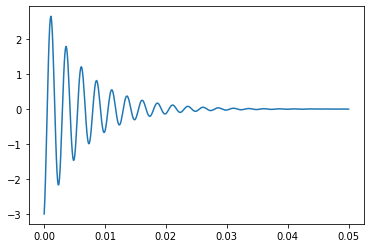

In [2]:
b_cos, b_sin = -3., 1.
bandwidth, frequency = 50., 400.
t, dt = linspace(0, .05, 500, retstep=True)
fs = 1/dt

alpha = np.pi*bandwidth
omega = 2*np.pi*frequency

periodic = (b_cos*np.cos(omega*t) + b_sin*np.sin(omega*t))*np.exp(-alpha*t)
plot(t, periodic)

time_power = sum(dt*periodic**2)
print("Power in time domain =", time_power)

In [3]:
# We use the Fourier transform as defined by Wiki page, i.e. without scaling factor
# and with negative sign in the exponent
f, df = linspace(0, fs/2, 400, retstep=True)

# Analytical transform
F = ((alpha + 2*pi*f*(1j))*b_cos + omega*b_sin)/((alpha + 2*pi*f*(1j))**2 + omega**2)
freq_power = 2*sum(df*abs(F)**2) # Factor 2 needed to account for negative frequencies
freq_power

0.015280270319642434

In [4]:
# Equivalent code from complete.magnitude_spectrum()
s = (2*np.pi*1j)*f
numerator = (alpha + s)*b_cos + omega*b_sin
denominator = (alpha + s)**2 + omega**2
F = numerator/denominator
freq_power = 2*sum(df*abs(F)**2)
freq_power

0.015280270319642434

0.015837543724689766

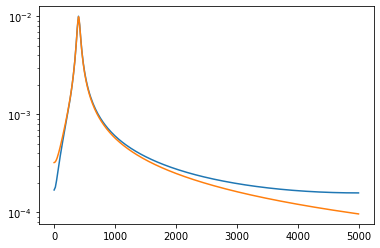

In [7]:
# Compare with FFT
P = np.fft.rfft(periodic)*dt
P_freq = np.fft.rfftfreq(len(periodic), dt)
dP_freq = P_freq[1]-P_freq[0]

plot(P_freq, abs(P))
plot(f, abs(F))
yscale('log')

FFT_power = 2*sum(dP_freq*abs(P)**2)
FFT_power